# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32BVWe

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения линейной регрессии
5. Написать уравнение линейной регрессии
6. Визуализировать данные и полученное уравнение линейной регрессии
7. Оценивать полученную модель с помощью MSE, MAE, R2.
8. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from google.colab import files
uploaded = files.upload()


In [3]:
fish = pd.read_csv('Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [33]:
print(fish.isna().sum())
print(fish.dtypes)
fish['Species'].unique()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
fish['Species'] = LabelEncoder().fit_transform(fish['Species'])
fish

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(35,6))  

sns.boxplot(fish['Length1'], ax=axes[0], width=0.3)
sns.boxplot(fish['Length2'], ax=axes[1], width=0.3)
sns.boxplot(fish['Length3'], ax=axes[2], width=0.3)
sns.boxplot(fish['Height'], ax=axes[3], width=0.3)
sns.boxplot(fish['Width'], ax=axes[4], width=0.3)
sns.boxplot(fish['Species'], ax=axes[5], width=0.3)

In [40]:
fish['Length3']
z = np.abs(stats.zscore(fish['Length3']))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
#data_clean = data[(z>=3)]
indexx=fish['Length3'].index[z>3].tolist()
print(indexx)
fish=fish.drop(index=indexx)
#find how many rows are left in the dataframe 
fish.shape

[]


(158, 7)

In [54]:
#2
y = fish['Weight']
x = fish.drop(['Weight'],axis=1)

#3
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [42]:
#4
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
w1 = model.coef_
w0 = model.intercept_

Веса всех признаков (w1):  [ 33.5192665   41.18606318  43.12578928 -58.42065617  54.49741299
  -8.95469899]
Свободный коэффицент уравнения w0: -611.8833155395073


In [55]:
#5
col = list(x)
for i in range(len(col)):
  print(f'Для признака {col[i]} уравнение y = {w0}+({w1[i]})*x')

Для признака Species уравнение y = -611.8833155395073+(33.51926649643121)*x
Для признака Length1 уравнение y = -611.8833155395073+(41.18606317899152)*x
Для признака Length2 уравнение y = -611.8833155395073+(43.12578928192141)*x
Для признака Length3 уравнение y = -611.8833155395073+(-58.42065616607473)*x
Для признака Height уравнение y = -611.8833155395073+(54.49741299355472)*x
Для признака Width уравнение y = -611.8833155395073+(-8.95469899183152)*x


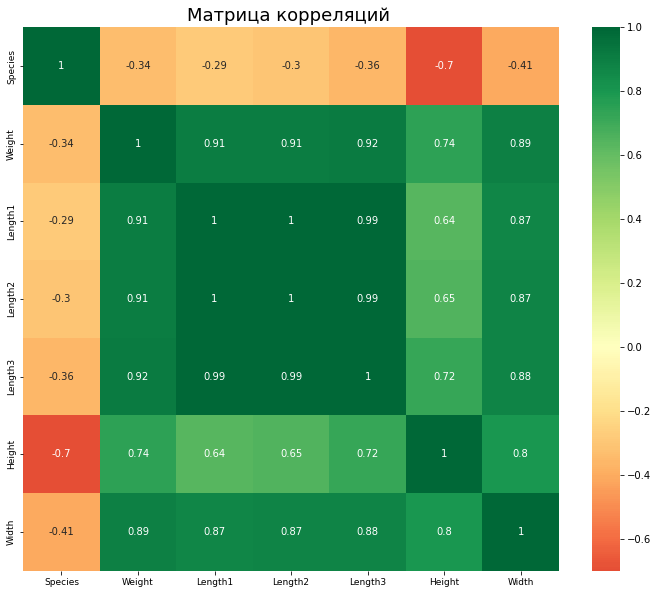

In [44]:

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(fish.corr(), xticklabels=fish.corr().columns, yticklabels=fish.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций ', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()
     


По матрице корреляций видно что Species - фигня, поэтому его удаляем
Пы.Сы. Результаты ухудшились, лучше оставить


In [48]:
#2
y = fish['Weight']
x = fish.drop(['Weight','Species'],axis=1)

#3
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [56]:
#7
y_pred = model.predict(x)
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 score:', r2_score(y, y_pred))


Mean Absolute Error: 83.0278688352528
Mean Squared Error: 12409.964862947569
R2 score: 0.8949820839059981


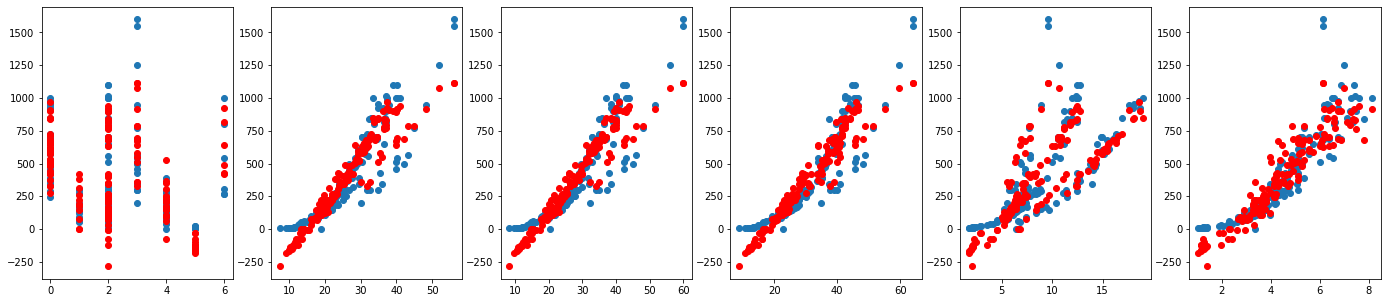

In [58]:
#6
fig, ax = plt.subplots(1,6,figsize=(24,5))
for i in range(6):
  ax[i].scatter(x[col[i]], y)
  ax[i].scatter(x[col[i]], y_pred, color='red');
plt.show()

все признаки являются значимыми,